# Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Question 2

Epoch: 20, Loss: 0.034302763640880585
Epoch: 40, Loss: 0.024285512045025826
Epoch: 60, Loss: 0.0182986818253994
Epoch: 80, Loss: 0.014659310691058636
Epoch: 100, Loss: 0.012446952052414417


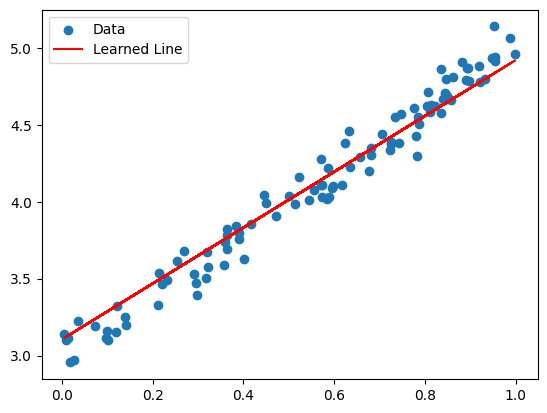

In [5]:
# Create synthetic dataset
X = np.random.rand(100, 1)
y = 2 * X + 3 + np.random.randn(100, 1) * 0.1

# Initialize the weights and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.zeros([1]))

# Define the linear model
def linear_model(x):
    return x * W + b

# Define the loss function (Mean Squared Error)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer (Stochastic Gradient Descent)
optimizer = tf.optimizers.SGD(learning_rate=0.1)

# Training loop
epochs = 100
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = linear_model(X)
        loss = loss_fn(y, y_pred)

    # Calculate gradients
    gradients = tape.gradient(loss, [W, b])

    # Update weights and bias
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if (epoch + 1) % 20 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.numpy()}')

# Plot the data and the learned regression line
plt.scatter(X, y, label="Data")
plt.plot(X, linear_model(X), color="red", label="Learned Line")
plt.legend()
plt.show()


# Question 3

In [3]:
# Define the model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Preprocess data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Train and evaluate Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Train and evaluate Keras deep learning model
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()
history = model.fit(X_train_scaled, y_train_encoded, epochs=150, batch_size=10, verbose=0)
keras_pred_probs = model.predict(X_test_scaled)
keras_pred = np.argmax(keras_pred_probs, axis=-1)

# Model performance metrics
models = {'Logistic Regression': (lr_pred, y_test),
          'Random Forest': (rf_pred, y_test),
          'Keras Deep Learning': (keras_pred, y_test)}

for model_name, (predictions, true_labels) in models.items():
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predictions)

    print(f"{model_name}:\n"
          f"Accuracy: {accuracy:.2f}\n"
          f"F1 Score: {f1:.2f}\n"
          f"Confusion Matrix:\n{conf_matrix}\n")




3/3 [==============================] - 0s 1ms/step
Logistic Regression:
Accuracy: 0.99
F1 Score: 0.99
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]

Random Forest:
Accuracy: 0.97
F1 Score: 0.97
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]

Keras Deep Learning:
Accuracy: 1.00
F1 Score: 1.00
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]



# Question 4

In [4]:
# Prepare the dataset
X = np.linspace(-10, 10, 1000)
Y = 2 * X + 1

# Define the model
class SimpleLinearModel(tf.Module):
    def __init__(self):
        self.W = tf.Variable(tf.random.normal([1]), name='weight')
        self.b = tf.Variable(tf.random.normal([1]), name='bias')

    def __call__(self, x):
        return self.W * x + self.b

model = SimpleLinearModel()

# Define the loss function
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Define the training loop
def train(model, inputs, outputs, num_epochs):
    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            predictions = model(inputs)
            curr_loss = loss(predictions, outputs)

        gradients = tape.gradient(curr_loss, [model.W, model.b])
        optimizer.apply_gradients(zip(gradients, [model.W, model.b]))

        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch+1}, Loss: {curr_loss.numpy()}')

# Train the model
train(model, X, Y, num_epochs=100)

# Test the model
test_input = tf.constant([5.0])
test_output = model(test_input)
print(f'Input: {test_input.numpy()}, Predicted Output: {test_output.numpy()}')


Epoch 20, Loss: 0.024304047226905823
Epoch 40, Loss: 0.010832334868609905
Epoch 60, Loss: 0.004827992524951696
Epoch 80, Loss: 0.002151842461898923
Epoch 100, Loss: 0.0009590794797986746
Input: [5.], Predicted Output: [11.03035]
